<a href="https://colab.research.google.com/github/mattstruhs/ml-knnClassifier/blob/master/KNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 12 12:54:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np 

# KNN Classifier
Building a KNN Classifier using NumPy

In [87]:
class KNNClassifier():

  def __init__(self,k): 
    # attributes
    # k = number of neighbors
    self.k = k

  # Methods: operations or actions 
  # data = X where “X” is a matrix that each row is a sample, and the columns are the features (shape = [num of samples,num of features])
  # labels = y where “y” is a vector with the corresponding class numbers (shape = [num of samples, ])
  def fit(self, X,y):
    print("Training data loaded")
    print("Shape of X is {} and size of y is {}".format(X.shape, y.size))
    self.X=X
    self.y=y


  # X_new = input samples in a matrix (X) 
  # returns the predicted classes in a vector and “X” shape is similar to the “X” in “fit” method
  def predict(self, X_new):

    results = []
    # for i in range(X_new.shape[0]):
    for i in range(200):

      # get nearest neighbors from training data
      sample = X_new[i,:]
      sq_distances = np.sum((self.X-sample)**2, axis=1) # calculate the Eucleadian distance, used broadcasting
      k_nearest = np.argsort(sq_distances)[:self.k] # sort and get the top k nearest (lowest distance)

      # get labels from nearest neighbors and find highest frequency
      classification = []
      for j in range(self.k):
        classification.append(self.y[k_nearest[j]]) # get training labels from nearest neighbors
      # print("classifications",classification)
      unique_labels, counts_labels = np.unique(classification, return_counts=True) # count unique training labels
      # print("unique labels",unique_labels, counts_labels)
      maxFrequency = counts_labels.max() # get max frequency of training labels
      maxFrequencyIndex = np.where(maxFrequency) # get index of max frequency
      # print("index of max frequency",maxFrequencyIndex)
      prediction = unique_labels[maxFrequencyIndex] # use index from max frequency to get label
      # print("prediction", prediction[0])
      # print("data type of prediction",type(prediction[0]))

      # store predictions in list
      results.append(prediction[0])
    return results


    # obs = []
    # for i in range(k_nearest):
      # obs.append(trainingResponse[k_nearest[i]])
    #   print(obs)
    #   print("Frequency of unique values of the said array:")
    #   print(np.asarray((unique_elements, counts_elements)))
  
    #   print("index of highest frequency", unique_elements[maxFrequency])



# Load Data

In [5]:
data = np.loadtxt('/content/drive/MyDrive/ML-Data/mnist.csv', delimiter=',')

In [7]:
print(data.size)
print(data.shape)

47100000
(60000, 785)


# Shuffle Samples

In [38]:
np.random.seed(2024)
np.random.shuffle(data)

# Split it to 80% for training and 20% for validation

In [39]:
trainSplit = int(data.shape[0]*.8)
training, test = data[:trainSplit,:], data[trainSplit:,:]
print(training.shape)
print(test.shape)

(48000, 785)
(12000, 785)


# Separate labels from input data for both training and validation data

In [40]:
print(data[:,0]) # the first column is the label
trainingDigits = training[:, 1:] # keep everything except the first label
trainingResponse = training[:,0] # vector of training response variables
print(trainingResponse)
print(trainingDigits.shape)
print(trainingResponse.shape)

[8. 3. 7. ... 2. 7. 5.]
[8. 3. 7. ... 5. 2. 4.]
(48000, 784)
(48000,)


In [41]:
testDigits = test[:, 1:] # keep everything except the first label
testResponse = test[:,0] # vector of test response variables
print(testDigits.shape)
print(testResponse.shape)

(12000, 784)
(12000,)


# For each K from 1 to 25 (create a loop), instantiate an object from “KNNClassifier” with that number of neighbors.

In [88]:
knnPredictions = []
for i in range(1,5):
  knn = KNNClassifier(i) # instantiate classifier object for each k
  fit = knn.fit(trainingDigits,trainingResponse) # pass classifier the training data and the target vector
  predict = knn.predict(testDigits) # pass classifier the data to be classified
  knnPredictions.append(predict) # store the results for comparison
print("knn Predictions", knnPredictions)

training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
training data loaded
knn Predictions [[9.0, 4.0, 8.0, 8.0, 5.0, 6.0, 1.0, 7.0, 5.0, 9.0, 4.0, 2.0, 5.0, 3.0, 1.0, 6.0, 0.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 2.0, 9.0, 9.0, 7.0, 9.0, 9.0, 0.0, 2.0, 4.0, 7.0, 4.0, 4.0, 8.0, 7.0, 1.0, 5.0, 3.0, 5.0, 1.0, 3.0, 6.0, 5.0, 7.0, 2.0, 9.0, 1.0, 6.0, 1.0, 1.0, 0.0, 2.0, 8.0, 8.0, 4.0, 2.0, 1.0, 1.0, 7.0, 1.0, 1.0, 0.0, 1.0, 3.0, 7.0, 7.0, 4.0, 9.0, 0.0, 9.0, 8.0, 0.0, 2.0, 1.0, 3.0, 7.0, 9.0, 4.0, 3.0, 2.0, 4.0, 8.0, 2.0, 6.0, 8.0, 2.0, 1.0, 4.0, 1.0, 6.0, 6.0, 8.0, 4.0

# Compare the predicted labels with the true labels and calculate accuracy:

In [114]:
successRatios = []
errorRatios = []
for i in range(len(knnPredictions)):
  compare = knnPredictions[i] == testResponse[:200] # compare label prediction to actual label
  accuracyCount = sum(compare) # count of succesful predictions
  accuracyRatio = accuracyCount / len(knnPredictions[i]) # success rate
  errorRatio = 1-accuracyRatio
  errorRatios.append(errorRatio)
  successRatios.append(accuracyRatio)
  notCorrectIndex = np.where(compare == False) # get index of which predictions we get wrong
  # print("k =",i+1)
  # print("Actual Labels of Mis-Classified",testResponse[notCorrectIndex]) # get label of prediction we get wrong
  # print("Accuracy Count",accuracyCount)
  # print("Accuracy Ratio",accuracyRatio)

# Visualization

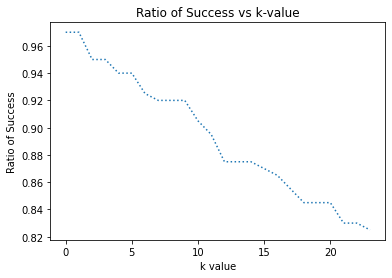

In [102]:
import matplotlib.pyplot as plt

plt.plot(successRatios, linestyle = 'dotted')
plt.title("Ratio of Success vs k-value")
plt.xlabel("k value")
plt.ylabel("Ratio of Success")
plt.show()

# Select k-value